In [1]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

In [2]:
connections = pd.read_csv('data/connections.csv', 
                   sep='\t', 
                   header=0)
connections.head(10)

,ts,imei,mwra,c.katana,c.android.gm,c.dogalize,c.android.chrome,c.android.youtube,c.raider,c.android.vending,c.UCMobile.x86,c.updateassist,c.UCMobile.intl
0,2018-05-05 10:00:00,359043379931766452,0.0,11.06115,12.03060,9.91193,11.61488,14.41566,0.00630,50.61159,59.89217,10.61973,29.26605
1,2018-05-05 10:01:00,3590433799317661479,1.0,10.36927,13.33058,10.47183,5.81122,13.42850,0.00335,42.15179,33.30329,37.55184,79.39223
2,2018-05-05 10:02:00,863033069630348941,1.0,11.13179,11.55974,10.19114,9.48536,11.48909,0.00687,31.98880,57.96025,98.36767,67.51165
3,2018-05-05 10:03:00,863033069630348891,0.0,18.55737,7.52229,9.76952,10.09019,8.59293,11.20737,63.24643,68.14477,1.25216,70.80992
4,2018-05-05 10:04:00,863033069630348982,1.0,16.23621,6.46232,14.43755,10.06295,7.56208,1.10024,52.21213,62.91701,39.23750,4.40841
5,2018-05-05 10:05:00,359043379931766890,0.0,12.65449,11.31760,12.80750,7.63353,6.94398,0.03072,46.84296,72.10419,65.21307,53.36385
6,2018-05-05 10:06:00,8630330696303482394,1.0,7.51715,9.71631,11.16790,14.25744,11.86472,0.00040,55.64279,51.34929,11.43310,93.70164
7,2018-05-05 10:07:00,8630330696303481552,1.0,10.42239,11.16408,15.36993,12.40764,15.72517,0.00342,39.94261,78.25351,78.85671,51.24171
8,2018-05-05 10:08:00,8630330696303482410,0.0,16.96537,7.81786,11.74992,8.24555,13.41690,2.28102,51.88202,51.86428,77.53953,71.13616
9,2018-05-05 10:09:00,8630330696303481289,0.0,11.72449,10.31466,7.08285,9.68121,13.50829,0.01218,41.56365,63.83457,63.27459,1.02142


In [3]:
processes = pd.read_csv('data/processes.csv', 
                   sep='\t', 
                   header=0)
processes.head(10)

,ts,imei,mwra,p.android.gm,p.android.chrome,p.android.packageinstaller,p.android.externalstorage,p.android.settings,p.android.documentsui,p.system,...,p.inputmethod.latin,p.katana,p.process.gapps,p.browser.provider,p.gms.persistent,p.android.vending,p.notifier,p.simulator,p.dogalize,p.android.defcontainer
0,2018-05-05 10:00:00,359043379931766452,0.0,4.76403,10.88071,11.51360,11.78927,9.99354,6.87053,13.51346,...,79.29044,10.79383,83.63731,6.32371,98.02549,68.85903,71.53462,2.25715,93.42594,21.75571
1,2018-05-05 10:01:00,3590433799317661479,1.0,11.46891,8.28988,7.09764,13.77786,15.06889,12.69941,12.31459,...,45.98593,99.59445,98.05942,7.98917,95.75324,84.32885,28.67616,33.34162,74.46069,50.49767
2,2018-05-05 10:02:00,863033069630348941,1.0,14.17447,10.60933,10.48707,11.42372,12.21700,15.63323,10.68789,...,80.90579,39.15136,35.96190,39.82428,23.28994,11.66910,73.73339,94.80023,29.08949,53.56893
3,2018-05-05 10:03:00,863033069630348891,0.0,13.24902,12.97128,14.07949,12.04242,15.05862,14.44617,13.38765,...,73.85500,85.74165,89.95390,23.31018,85.76856,83.81530,77.31641,77.72672,82.13086,77.27342
4,2018-05-05 10:04:00,863033069630348982,1.0,10.03368,9.47160,8.07917,14.44551,15.64555,8.80989,7.84002,...,19.27745,26.95881,61.93643,71.64654,85.38242,49.78533,37.98503,90.32310,39.01098,5.83207
5,2018-05-05 10:05:00,359043379931766890,0.0,12.10487,7.06790,10.77449,11.54052,13.25847,8.67721,8.88003,...,63.77575,66.61781,32.08551,48.18337,34.87881,99.56064,23.62307,23.62557,30.64260,16.19268
6,2018-05-05 10:06:00,8630330696303482394,1.0,11.20547,13.54670,6.01785,13.97898,9.35211,8.64164,14.59811,...,62.71154,6.37995,49.26883,14.26143,35.61887,99.91404,78.01157,0.10921,85.78794,3.44839
7,2018-05-05 10:07:00,8630330696303481552,1.0,9.43152,11.19937,10.16669,13.59798,12.60449,14.07398,15.60397,...,68.55050,74.45278,46.79925,99.01885,12.66284,62.62353,22.11113,9.42886,74.13334,84.01403
8,2018-05-05 10:08:00,8630330696303482410,0.0,9.40552,11.05332,10.70500,12.36928,11.72829,12.71607,11.03679,...,80.48845,68.66819,78.93986,70.78193,4.54058,3.58426,84.71937,40.42517,54.45794,30.66241
9,2018-05-05 10:09:00,8630330696303481289,0.0,7.14433,11.25230,14.82949,14.69164,13.77117,11.75249,10.76002,...,28.58429,11.06029,92.74713,92.41559,40.25147,33.18383,59.26034,77.34647,32.94507,63.39220


In [4]:
# Odstranenie duplicit
connections.drop_duplicates( inplace=True)
processes.drop_duplicates(inplace=True)

In [5]:
# Spojenie tabuliek Connections a Processes podla imei a ts
df = pd.merge(connections, processes, on=['imei', 'ts','mwra'], how='outer')
df.drop(columns=["ts"], inplace=True)

In [6]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)

    return a[(a > upper) | (a < lower)]

In [7]:
def filter_outliers(df,column,action):
    outliers = identify_outliers(df[column])
    if action == 'delete':
        df.drop(index=outliers.index,inplace=True)
    elif action == 'replace':
        lower_bound = df[column].quantile(0.05)
        upper_bound = df[column].quantile(0.95)

        df[column] = np.where(
            df[column] < lower_bound, lower_bound,
            np.where(df[column] > upper_bound, upper_bound, df[column])
        )

In [8]:
def prepareData(X,Y):
    columns_to_edit = [
        'c.android.gm', 'c.dogalize', 'c.android.chrome', 'c.android.youtube', 
        'c.katana', 'c.android.vending', 'c.UCMobile.x86', 'c.updateassist', 
        'c.UCMobile.intl', 'p.android.gm', 'p.android.chrome', 'p.android.packageinstaller', 
        'p.android.externalstorage', 'p.android.settings', 'p.android.documentsui', 
        'p.system', 'p.google', 'p.android.gms', 'p.olauncher', 'c.katana'
    ]
    
    for column in columns_to_edit:
        filter_outliers(X, column, action='delete')
        
    # Synchronizacia zaznamov x_train s y_train a reset indexov
    Y = Y.loc[X.index]
    X = X.reset_index(drop=True)
    Y = Y.reset_index(drop=True)
    
    return X,Y

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# k = pocet atributov kt. chcem aby selector vybral
def createPipeline(scaling='standard',transformation='quantile',k=10):
    
    # Na c.raider pouzijeme transformaciu
    if transformation == 'quantile':
        preprocessor = ColumnTransformer(
        transformers=[
            ('quantile', QuantileTransformer(output_distribution='normal', random_state=0), ['c.raider']),
        ],
        remainder='passthrough'  # Zvyšné stĺpce necháme zmeny, aby sme ich mohli následne škálovať
    )
    else:
          preprocessor = ColumnTransformer(
        transformers=[
            ('power', PowerTransformer(method='yeo-johnson', standardize=True), ['c.raider']),
        ],
        remainder='passthrough'
    )
        
    if scaling == 'standard':
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('scaler', StandardScaler()),
            ('feature_selection', SelectKBest(mutual_info_classif, k=k)),
        ])
    else:
         pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('scaler', RobustScaler()),
            ('feature_selection', SelectKBest(mutual_info_classif, k=k)),
        ])
    
    return pipeline

#### Ked budes skusat ine pipeliny musis data obnovit odtialto

In [10]:
# Shuffle Samples
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Rozdelenie dat na trenovaciu a testovaciu sadu
X = df.drop(columns='mwra')
Y = df['mwra']
x_Train, x_Test, y_Train, y_Test =  train_test_split(X, Y, test_size=0.2, random_state=1)

#### Tu skusaj rozne pipeliny ktorý dáva najlepšie výsledky mne daval robust + quantile

In [11]:
# Vytvorenie pipeline
# S atributmi scaling a transformation mozem vytvorit rozne pipeliny

# pipeline = createPipeline(k=10,scaling='robust',transformation='yeo-johnson')
pipeline = createPipeline(k=10,scaling='robust',transformation='quantile')
# pipeline = createPipeline(k=10,scaling='standard',transformation='yeo-johnson')
# pipeline = createPipeline(k=10,scaling='standard',transformation='quantile')

In [12]:
x_Train, y_Train = prepareData(x_Train, y_Train)
x_Test, y_Test = prepareData(x_Test, y_Test)

In [13]:
transformed_train_data = pipeline.fit_transform(x_Train, y_Train)
transformed_test_data = pipeline.transform(x_Test)
    
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

selected_features = [
    feature_names[i]
    for i in range(len(feature_names))
    if pipeline.named_steps['feature_selection'].get_support()[i]
]
selected_features = [name.split('__')[-1] for name in selected_features] 

x_Train = pd.DataFrame(transformed_train_data, columns=selected_features)
x_Train

,c.raider,c.katana,c.android.gm,c.android.chrome,c.android.youtube,p.android.gm,p.android.packageinstaller,p.android.settings,p.android.documentsui,p.system
0,-1.277795,-1.277385,0.200092,-0.631116,0.451400,0.857728,1.378896,-0.263017,1.682133,0.362371
1,-0.203881,-0.190314,-0.980255,1.262580,0.234046,0.117304,0.649766,-0.156548,-0.921366,-0.243339
2,-0.349544,-0.317115,-1.283745,0.918445,0.418369,0.229275,0.452290,-1.079069,-0.734206,-1.045019
3,1.377416,1.435224,-0.682363,-0.248628,-0.917364,0.902927,0.754483,0.357069,-0.296013,-0.459468
4,0.087718,0.081489,-0.124374,0.734507,0.815415,-1.114762,0.669241,-0.818532,-1.834233,-0.100787
...,...,...,...,...,...,...,...,...,...,...
10920,0.254069,0.272176,-0.964789,0.756163,-0.287828,0.415787,-0.517159,-0.341471,0.042183,-0.064052
10921,-0.963778,-0.795692,-0.061262,0.539472,0.654612,-0.327326,0.040903,-1.714111,-0.937007,0.127600
10922,0.157846,0.158302,-0.310629,0.171636,-1.239614,0.155687,-1.166330,0.131975,-0.730413,-1.270941
10923,0.187482,0.192575,-0.099931,0.787522,0.082274,-0.948578,-0.822347,-0.608214,-0.521088,-0.129457


In [14]:
x_Test = pd.DataFrame(transformed_test_data, columns=selected_features)
x_Test

,c.raider,c.katana,c.android.gm,c.android.chrome,c.android.youtube,p.android.gm,p.android.packageinstaller,p.android.settings,p.android.documentsui,p.system
0,-0.316651,-0.296966,0.157182,0.066086,-0.140796,0.361050,0.505906,-0.229728,-0.207346,-0.499064
1,0.068388,0.059344,0.543532,0.368754,0.749914,-0.301209,0.096224,-1.438303,-1.200862,1.169320
2,-0.808454,-0.708839,0.615040,-0.849141,-0.461341,0.280696,1.104913,0.388831,0.723013,-0.180477
3,0.261329,0.283062,0.090026,0.756744,-0.438496,0.133739,1.055350,0.226687,0.862542,0.051372
4,-0.194246,-0.188549,-0.371446,0.757718,0.174782,-0.162075,-0.264246,-0.769543,-0.636347,0.133729
...,...,...,...,...,...,...,...,...,...,...
2710,-0.150312,-0.142910,1.858654,-0.517938,0.513069,0.003318,-1.130018,0.259163,-0.519839,0.002383
2711,-0.070373,-0.064870,0.205071,0.539922,0.531393,-0.495957,-0.567719,-1.623209,-0.557181,0.359619
2712,-0.509027,-0.464332,-0.505811,0.171290,-0.396916,0.530828,-0.206268,0.152711,0.322498,-1.179969
2713,-0.121948,-0.125116,-1.088701,1.086192,-0.181046,0.322925,-0.726193,0.786991,-0.726295,0.221164


# 3.Faza Strojové učenie

## 3.1 Jednoduchý klasifikátor na základe závislosti v dátach  (5b)
### (A-3b) Naimplementujte jednoduchý ID3 klasifikátor s hĺbkou min 2 (vrátane root/koreň). 

In [15]:
id3_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=7)

id3_classifier.fit(x_Train, y_Train)

y_pred = id3_classifier.predict(x_Test)

### (B-1b) Vyhodnoťte Váš ID3 klasifikátor pomocou metrík accuracy, precision a recall.

In [16]:
id3_test_res = accuracy_score(y_Test, y_pred)
precision = precision_score(y_Test, y_pred, average='weighted')
recall = recall_score(y_Test, y_pred, average='weighted')   

print("Accuracy", id3_test_res)
print("Precision:", precision)
print("Recall:", recall)

Accuracy 0.8777163904235727
Precision: 0.8773076660737802
Recall: 0.8777163904235727


### (C-1b) Zístite či Váš ID3 klasifikátor má overfit.

In [17]:
# Zistime metriky na trenovacich datach
y_train_pred = id3_classifier.predict(x_Train)
id3_train_res = accuracy_score(y_Train, y_train_pred)
train_precision = precision_score(y_Train, y_train_pred, average='weighted')
train_recall = recall_score(y_Train, y_train_pred, average='weighted')

print("Train Accuracy", id3_train_res)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)

Train Accuracy 0.9066361556064073
Train Precision: 0.9065868463754065
Train Recall: 0.9066361556064073


#### ID3 klasifikátor nemá overfit pretože rozdiel medzi výsledkami na trenovácich dátach a testovacich je minimalny

## 3.2 Trénovanie a vyhodnotenie klasifikátorov strojového učenia (5b)
### (A-1b) Na trénovanie využite jeden stromový algoritmus v scikit-learn.

In [18]:
rf_classifier = RandomForestClassifier(
                    random_state=1,
                    n_estimators=150,       
                    max_depth=10,           
                    min_samples_split=5,    
                    min_samples_leaf=3,    
                    class_weight='balanced'
)

rf_classifier.fit(x_Train, y_Train)

y_train_pred = rf_classifier.predict(x_Train)
y_pred_rf = rf_classifier.predict(x_Test)

rf_test_res = accuracy_score(y_Test, y_pred_rf)
rf_train_res = accuracy_score(y_Train, y_train_pred)

print("Test Accuracy:", rf_test_res)
print("Train Accuracy", rf_train_res)

Test Accuracy: 0.8953959484346224
Train Accuracy 0.9225629290617849


### (B-1b) Porovnajte s jedným iným nestromovým algoritmom v scikit-learn.

In [19]:
# Ako nestromový algoritmus použijem SVM

from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(x_Train, y_Train)

y_test_pred = svm_model.predict(x_Test)
y_train_pred = svm_model.predict(x_Train)

svm_test_res = accuracy_score(y_Test, y_test_pred)
svm_train_res = accuracy_score(y_Train, y_train_pred)

print("SVM - Test Accuracy:", svm_test_res)
print("SVM - Train Accuracy:", svm_train_res)

SVM - Test Accuracy: 0.9023941068139963
SVM - Train Accuracy: 0.9133180778032036


### (C-1b) Porovnajte výsledky s ID3 z prvého kroku.

In [20]:
print("ID3 - Test Accuracy:", id3_test_res)
print("ID3 - Train Accuracy:", id3_train_res)

print("Random Forest - Test Accuracy:", accuracy_score(y_Test, y_pred_rf))
print("Random Forest - Train Accuracy", accuracy_score(y_Train, y_train_pred))

print("SVM - Test Accuracy:", svm_test_res)
print("SVM - Train Accuracy:", svm_train_res)

ID3 - Test Accuracy: 0.8777163904235727
ID3 - Train Accuracy: 0.9066361556064073
Random Forest - Test Accuracy: 0.8953959484346224
Random Forest - Train Accuracy 0.9133180778032036
SVM - Test Accuracy: 0.9023941068139963
SVM - Train Accuracy: 0.9133180778032036


#### Priemerne najlepšie výsledky dával SVM model a najhoršie ID3

### (D-1b) Vizualizujte natrénované pravidlá minimálne pre jeden Vami vybraný algoritmus

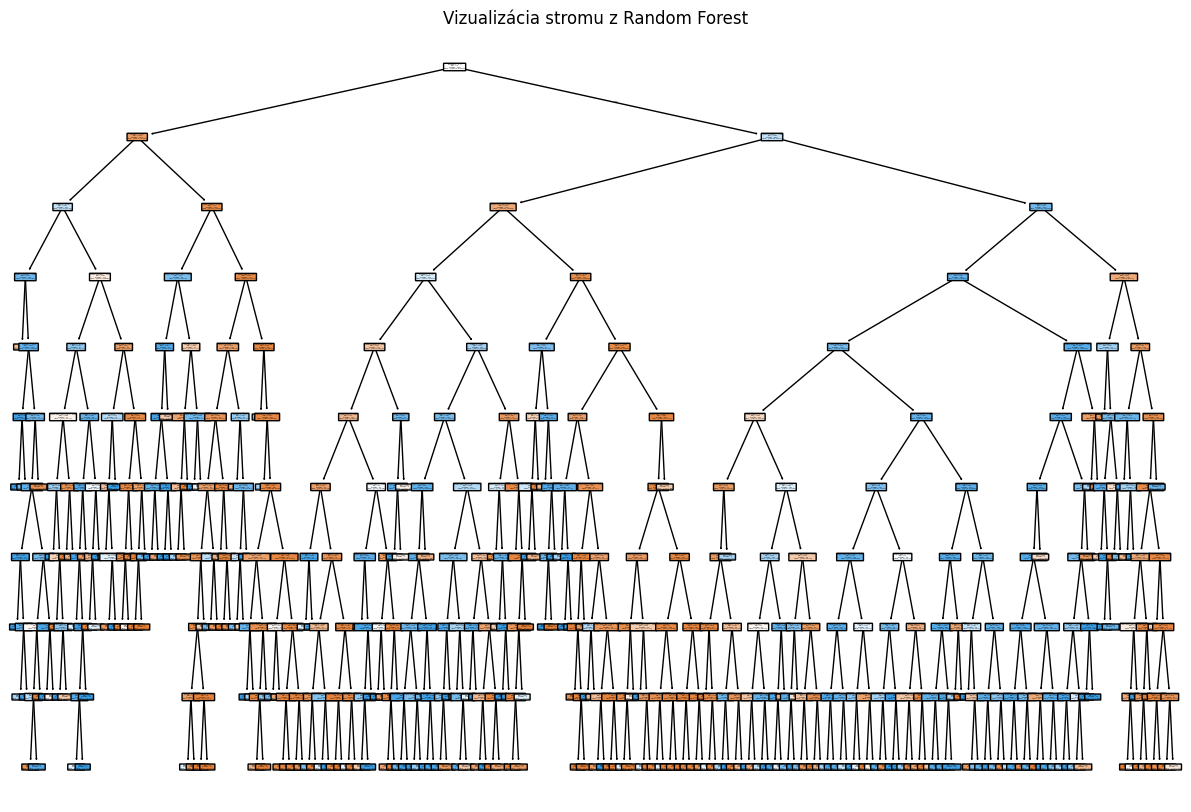

In [21]:
single_tree = rf_classifier.estimators_[0]

# Vizualizácia vybraného stromu
plt.figure(figsize=(15, 10))
plot_tree(
    single_tree, 
    feature_names=x_Train.columns, 
    class_names=['0', '1'], 
    filled=True, 
    rounded=True
)
plt.title("Vizualizácia stromu z Random Forest")
plt.show()

### (E-1b) Vyhodnoťte natrénované modely pomocou metrík accuracy, precision a recall

## 3.3 Optimalizácia alias hyperparameter tuning (5b)
### (A-1b) Vyskúšajte rôzne nastavenie hyperparametrov (tuning) pre zvolený algoritmus tak, aby ste optimalizovali výkonnosť (bez underfitingu)

In [32]:
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier(random_state=1, class_weight='balanced')

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 7],
    'min_samples_leaf': [1, 3, 5, 7],
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(x_Train, y_Train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Make predictions on training and testing data
y_train_pred = best_rf_classifier.predict(x_Train)
y_pred_rf = best_rf_classifier.predict(x_Test)

# Calculate accuracy
rf_train_res = accuracy_score(y_Train, y_train_pred)
rf_test_res = accuracy_score(y_Test, y_pred_rf)

# Print results
print("Test Accuracy:", rf_test_res)
print("Train Accuracy:", rf_train_res)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Test Accuracy: 0.8976058931860037
Train Accuracy: 0.9492906178489703


### (B-1b) Vyskúšajte kombinácie modelov (ensemble) pre zvolený algoritmus tak, aby ste optimalizovali výkonnosť (bez underfitingu)

In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Definovanie modelov
#rf = RandomForestClassifier(random_state=1, n_estimators=50, max_depth=None,min_samples_split=10, min_samples_leaf=1, class_weight='balanced')
svm = SVC(random_state=1)
logreg = LogisticRegression(random_state=1)

# Kombinovanie modelov v rámci voting classifier
voting_clf = VotingClassifier(estimators=[('rf', best_rf_classifier), ('svm', svm), ('logreg', logreg)], voting='hard')

# Tréning a vyhodnotenie modelu
voting_clf.fit(x_Train, y_Train)
voting_pred = voting_clf.predict(x_Test)
y_train_pred = voting_clf.predict(x_Train)

voting_test_res = accuracy_score(y_Test, voting_pred)
voting_train_res = accuracy_score(y_Train, y_train_pred)
print(f"Voting Classifier Test Accuracy: {voting_test_res}")
print("Voting Classifier Test Accuracy:", rf_train_res)

Voting Classifier Test Accuracy: 0.8987108655616943
Voting Classifier Test Accuracy: 0.9396796338672769


### (C-1b) Využite krížovú validáciu (cross validation) na trénovacej množine.

In [33]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training set
cv_scores = cross_val_score(rf_classifier, x_Train, y_Train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())

# Fit the model on the entire training set
rf_classifier.fit(x_Train, y_Train)

# Predictions on the training and test sets
y_train_pred = rf_classifier.predict(x_Train)
y_pred_rf = rf_classifier.predict(x_Test)

# Accuracy on the train and test sets
rf_train_res = accuracy_score(y_Train, y_train_pred)
rf_test_res = accuracy_score(y_Test, y_pred_rf)

print("Train Accuracy (After fitting):", rf_train_res)
print("Test Accuracy (After fitting):", rf_test_res)

Cross-validation Accuracy Scores: [0.90480549 0.89656751 0.90434783 0.91029748 0.90480549]
Mean Cross-validation Accuracy: 0.9041647597254003
Train Accuracy (After fitting): 1.0
Test Accuracy (After fitting): 0.8983425414364641


### (D-2b) Dokážte že Váš nastavený najlepší model je bez overfitingu.

### Grid Search

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

Test Accuracy: 0.8976058931860037

Train Accuracy: 0.9492906178489703


### Cross validation

Cross-validation Accuracy Scores: [0.90480549 0.89656751 0.90434783 0.91029748 0.90480549]

Mean Cross-validation Accuracy: 0.9041647597254003Cross-validation Accuracy Scores: [0.90480549 0.89656751 0.90434783 0.91029748 0.90480549]

Mean Cross-validation Accuracy: 0.9041647597254003

Train Accuracy (After fitting): 1.0

Test Accuracy (After fitting): 0.8983425414364641



## 3.4 Vyhodnotenie vplyvu zvolenej stratégie riešenia na klasifikáciu (5b) 
### (A-1b) Stratégie riešenia chýbajúcich hodnôt a outlierov

### (B-1b) Dátová transformácia (scaling, transformer, …)

### (C-1b) Výber atribútov, výber algoritmov, hyperparameter tuning, ensemble learningBest 
Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

### (D-1b) Ktorý model je Váš najlepší model pre nasadenie (deployment)? 



### (E-1b) Aký je data pipeline pre jeho vybudovanie na základe Vášho datasetu v produkcii? 

createPipeline(k=10,scaling='robust',transformation='quantile')